In [2]:
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

In [46]:
model = keras.models.load_model('./models/classification_v2')

In [151]:
VAL_IMAGES_PATH = "./data/validation_data/"
height, width = 128, 128

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = test_datagen.flow_from_directory(
    VAL_IMAGES_PATH,
    target_size=(height, width),
    shuffle=False,
    class_mode="binary",
)
predictions_proba = model.predict(validation_generator).flatten()
predictions = np.where(predictions_proba < .5, 0, 1).flatten()
y_true = validation_generator.classes.flatten()

result_df = pd.DataFrame(
    {
    'Prediction':predictions,
    'Probability':predictions_proba,
    'Label':y_true,
    'Path':validation_generator.filenames
    }
)


Found 434 images belonging to 2 classes.
14/14 [==============================] - 12s 850ms/step


In [152]:
result_df[result_df['Prediction'] != result_df['Label']]

,Prediction,Probability,Label,Path
32,1,0.564628,0,0/Ingame_Validation_127.jpg
33,1,0.646659,0,0/Ingame_Validation_128.jpg
34,1,0.641049,0,0/Ingame_Validation_129.jpg
36,1,0.667307,0,0/Ingame_Validation_130.jpg
37,1,0.661575,0,0/Ingame_Validation_131.jpg
...,...,...,...,...
117,1,0.677864,0,0/Ingame_Validation_203.jpg
118,1,0.690203,0,0/Ingame_Validation_204.jpg
119,1,0.686334,0,0/Ingame_Validation_205.jpg
120,1,0.676458,0,0/Ingame_Validation_206.jpg


In [95]:
# Evaluate on Validation data
scores = model.evaluate(validation_generator, verbose=0)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[2], scores[2]*100))
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[3], scores[3]*100))



evaluate accuracy: 81.34%
evaluate precision: 73.62%
evaluate recall: 100.00%


In [110]:
validation_generator.reset()
predictions_proba=model.predict(validation_generator)
predictions = np.where(predictions_proba < .5, 0, 1)

14/14 [==============================] - 10s 720ms/step


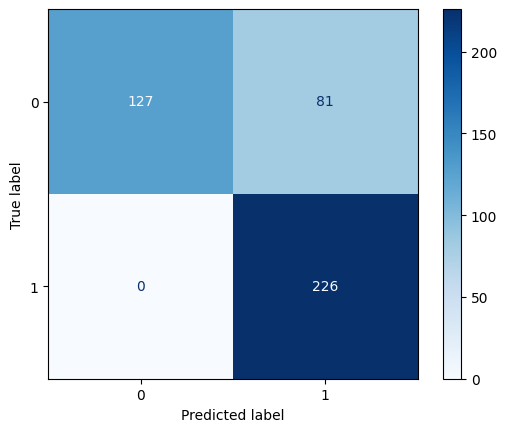

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, predictions, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')

In [140]:
image_path = './data/validation_data/1/Break_Validation_205.jpg'

#load the image
my_image = load_img(image_path, target_size=(128, 128))
#preprocess the image

my_image = img_to_array(my_image)
my_image /= 255.
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
single_prediction_proba = model.predict(my_image)
single_prediction = np.where(single_prediction_proba < .5, 0, 1)


1/1 [==============================] - 0s 19ms/step


In [141]:
single_prediction

array([[1]])

In [4]:
image_path = './data/validation_data/1/Break_Validation_205.jpg'

my_image = load_img(image_path, target_size=(128, 128))


TypeError: path should be path-like or io.BytesIO, not <class 'PIL.Image.Image'>